In [1]:
import sys
local_path = !pwd
project_path = '/'.join(local_path[0].split('/')[:-1])
sys.path.append(project_path + '/src')
images_path = project_path + '/data/101_ObjectCategories/'

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import helpers
import numpy as np
import pywt
from dwt_search import *
from scipy.misc import imread, imresize

## Load example data

Indices are chosen to only select color images.

In [2]:
images_path = project_path + '/data/101_ObjectCategories/'
example_image_categories = ['butterfly/', 'platypus/', 'dolphin/', 'elephant/', 'Faces/']
noise_image_categories = ['crocodile/']

idxs = [range(1, 9)]
image_categories = example_image_categories + noise_image_categories
example_images = [imread(images_path + c + '/image_000{}.jpg'.format(i)) for i in range(1,9) for c in image_categories]

nautilus_idxs = [15, 21, 23, 24, 25]
nautilus_img9 = imread(images_path + 'nautilus/image_000{}.jpg'.format(9))
nautilus_imgs = [nautilus_img9]+ [imread(images_path + 'nautilus/image_00{}.jpg'.format(i)) for i in nautilus_idxs]

example_images = example_images + nautilus_imgs 

## Query data

Query images are loaded from *data/queries* folder.

In [3]:
query_images = [imread(project_path + '/data/queries/{}.jpg'.format(i)) for i in range(8)]

## Coefficient transformer and thresholder

[WaveletCoefficientTransformer](https://github.com/lambdaofgod/wavelets-project/blob/master/src/dwt_search/coefficients.py#L5) transformer takes image and returns l-level wavelet transform's cA coefficients.

[ThresholdTransformer](https://github.com/lambdaofgod/wavelets-project/blob/master/src/dwt_search/thresholding.py#L6) first thresholds values (sets values less than 1000th value to 0) and then takes sign of resulting signal.

In [4]:
l = 1
wavelet_name = 'haar'
coeff_transformer = WaveletCoefficientTransformer(ndim=3, wavelet=wavelet_name, mode='symmetric', level=l)
thresholder = ThresholdTransformer(n=1000, take_sign=True)

## Image querying metric

Image querying metric takes appropriate transformers discussed above, and uses them to map signals to reduced representation.

Fitted example images are then transformed to this representation and cached.

[ImageQueryingMetric](https://github.com/lambdaofgod/wavelets-project/blob/master/src/dwt_search/querying_metric.py#L10), paragraph 2 of the paper, is then used to match closest image from fitted images for specified image using these coefficients.

Matching of coefficients is done using $l_1$ metric.

In [5]:
weights = np.ones((128, 128, 3))
iqm = ImageQueryingMetric(
  coeff_transformer,
  thresholder,
  in_shape=(256, 256),
  weights=weights)

iqm.fit(example_images)

## Run reverse image search based on image querying metric

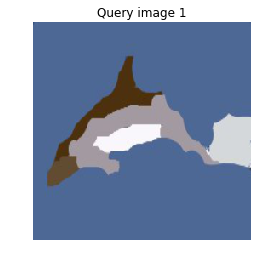

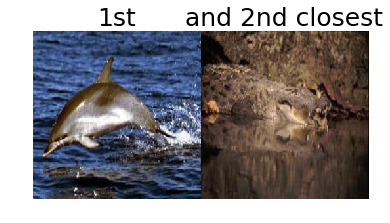

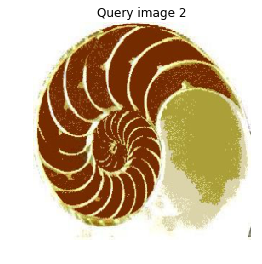

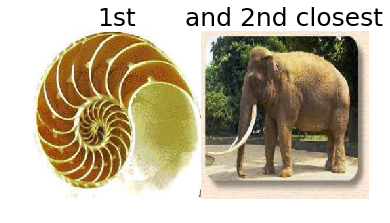

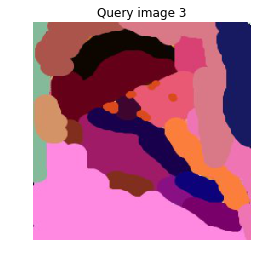

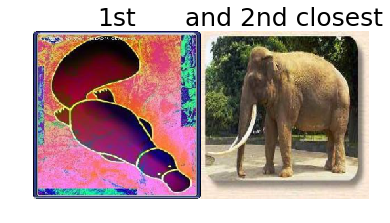

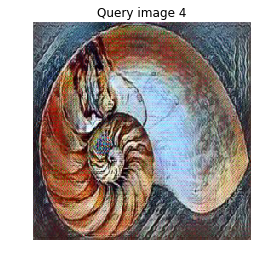

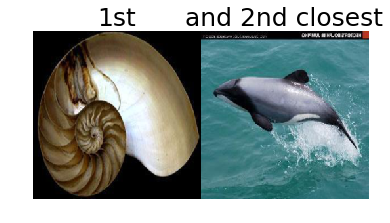

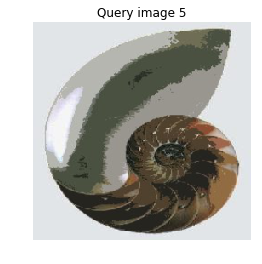

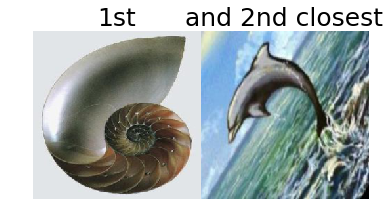

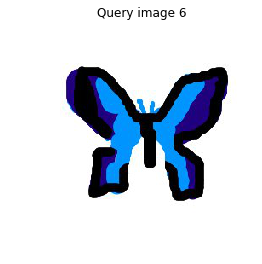

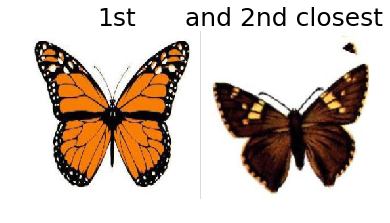

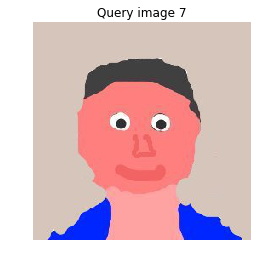

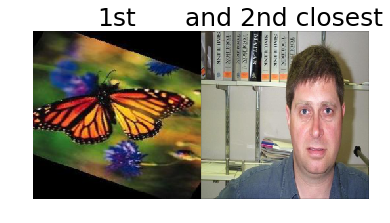

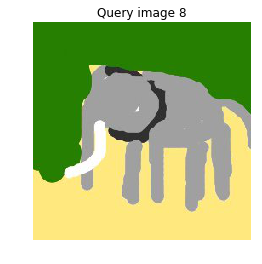

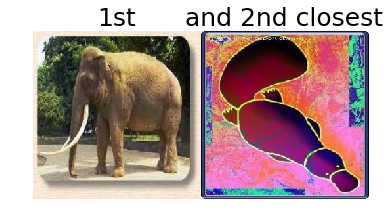

In [6]:
for i, img in enumerate(query_images):
  plt.imshow(imresize(img, (256, 256)))
  plt.title('Query image {}'.format(i+1))
  plt.axis('off')
  plt.show()
  img_indices, __ = iqm.predict_single(img, 2)
  imgs = [imresize(example_images[i], (256, 256)) for i in img_indices]

  helpers.plot_linear_layout(imgs, ['1st', 'and 2nd closest'])